# [Titanic Dataset](https://www.kaggle.com/c/titanic/overview)

# Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/titanic_train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## Check duplicates

In [ ]:
df.duplicated().sum()

0

## Check missing

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<h3><b>To do:</b></h3>

* Drop PassengerID.

* Interpolate Titles from names, and update age missing values by title median age.


# Data Engineering & EDA

## Handle missing values (Age)

### Create New feature "Title"

In [ ]:
def add_title(name):
    # Use regex to extract the title
    return name.str.extract(r' ([A-Za-z]+)\.', expand=False)

def update_title(titles):
    # Standardize to common titles
    titles = titles.replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    titles = titles.replace(['Mlle', 'Ms'], 'Miss')
    titles = titles.replace(['Mme', 'Lady', 'Countess'], 'Mrs')
    return titles

# # Create new dataframe for modification
df_mod = df.copy(deep=True)
df_mod.drop(columns=['PassengerId'], inplace=True)
df_mod['Title'] = add_title(df_mod['Name'])
df_mod['Title'] = update_title(df_mod['Title'])


<Axes: xlabel='count', ylabel='Title'>

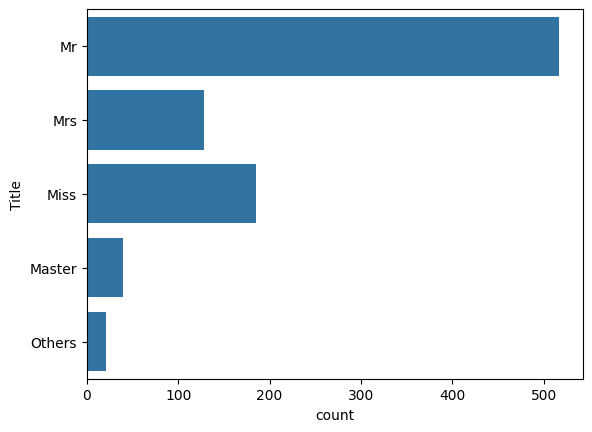

In [ ]:
sns.countplot(df_mod['Title'])

In [ ]:
df_mod['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,128
Master,40
Others,21


In [ ]:
# df_mod.loc[30,'Title'] = 'Mr.'
# df_mod.loc[369,'Title'] = 'Miss'
# df_mod.loc[443,'Title'] = 'Mrs.'
# df_mod.loc[641,'Title'] = 'Miss'
# df_mod.loc[710,'Title'] = 'Miss'
# df_mod.loc[759,'Title'] = 'Miss'
# df_mod.loc[822,'Title'] = 'Mr.'

In [ ]:
df_mod['Title'].isnull().sum()

0

### Pie chart (Title)

In [ ]:
import plotly.express as px

percentage = df_mod['Title'].value_counts(normalize=True)

labels = list(df_mod['Title'].unique())
sizes = list(percentage)

fig = px.pie(df_mod,
             values=sizes, names=labels, title='Title Distribution')
fig.show()

# plt.figure(figsize=(12,8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.title('Title Distribution')
# plt.show()

### Missing Age Investigation

In [ ]:
df_mod['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,128
Master,40
Others,21


In [ ]:
# Titles with Missing age
df_mod[df_mod['Age'].isna()]['Title'].value_counts()

,count
Title,
Mr,119
Miss,36
Mrs,17
Master,4
Others,1


In [ ]:
# Titles with age
df_mod[df_mod['Age'].notna()]['Title'].value_counts()

,count
Title,
Mr,398
Miss,149
Mrs,111
Master,36
Others,20


In [ ]:
# Expected age to impute for each title
df_mod.groupby('Title')['Age'].median()

,Age
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Others,49.0


### Impute missing value in Age with Median age of each title group

In [ ]:
df_mod['Age_update'] = df_mod.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# df_mod.to_csv('titanic_train_mod.csv', index=False)

### Age distribution

#### Boxplot (Age distribution old vs new)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Boxplots with Plotly
fig = go.Figure()

# Boxplot for Age by Title
fig.add_trace(go.Box(
    x=df_mod['Age'],
    y=df_mod['Title'],
    name='Age (before) Distribution by Title',
    orientation='h'))

# Boxplot for Age updated by Title
fig.add_trace(go.Box(
    x=df_mod['Age_update'],
    y=df_mod['Title'],
    name='Age (after) Distribution by Title',
    orientation='h'))

# Undate funcition attributes
fig.update_layout(
    title="Age Distribution by Title (Before and After)",
    xaxis_title="Age",
    yaxis_title="Title",
    boxmode='group',  # group the plots together
    )

fig.show()


#### Bar chart (age old vs new)

In [ ]:
import plotly.graph_objects as go

titles = list(df_mod.groupby('Title')[['Age']].count().index)

fig = go.Figure()

# Age origin
fig.add_trace(go.Bar(
    x=titles,
    y=df_mod.groupby('Title')['Age'].count(),
    name='Age (before)',
    marker_color='blue'
))

# Age updated
fig.add_trace(go.Bar(
    x=titles,
    y=df_mod.groupby('Title')['Age_update'].count(),
    name='Age (after)',
    marker_color='green'
))

# Update layout
fig.update_layout(
    title="Age Distribution (Before and After)",
    xaxis_title="Age",
    yaxis_title="Count",
    barmode='group',
)

---

## Handle missing values (Embarked)

In [ ]:
df_mod[df_mod['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_update
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,38.0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,62.0


In [ ]:
# Fill remaining NaN values in Embarked with the overall mode
overall_mode = df_mod['Embarked'].mode()[0]
df_mod['Embarked'].fillna(overall_mode, inplace=True)

df_mod.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


## Handle missing values (cabins)

### Create new feature 'Deck'

- Based on my readin of Titanic in wikipedia, Cabin is an important feature because the location of cabin will determine how long/fast passenger takes to reach the rescue boat. Passenger staying higher deck will have quicker access in the event of emergency.

- First i will create a new feature 'Deck' with the first alphabet of Cabin, if None then return 'U' as unknown.

- Then use RandomForestClassifer/DecisionTreeClassifier to train with Pclass, Fare and Embark features to predict the Deck with U value.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

# Create a new feature 'Deck' by extracting the first letter of 'Cabin'
df_mod['Deck'] = df_mod['Cabin'].str[0].fillna('U')  # 'U' for unknown

df_deck = df_mod.copy()

# One-hot encode 'Embarked'
df_deck = pd.get_dummies(df_deck, columns=['Embarked'], dtype=int)

# Split data into known and unknown Deck
deck_train = df_deck[df_mod['Deck'] != 'U']  # Known Deck values
deck_test = df_deck[df_mod['Deck'] == 'U']  # Missing Deck values

# Ensure all columns exist
possible_embarked_columns = ['Embarked_Q', 'Embarked_S', 'Embarked_C']
for col in possible_embarked_columns:
    if col not in deck_train.columns:
        deck_train[col] = 0

# Features, target split
X_train = deck_train[['Pclass', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]
y_train = deck_train['Deck']  # Target is Deck

# Train test split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Instantiate classifiers
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
dt_classifier.fit(X_train_split, y_train_split)
rf_classifier.fit(X_train_split, y_train_split)

# Evaluate both models on the validation set
rfc_val_preds = rf_classifier.predict(X_val_split)
dtc_val_preds = dt_classifier.predict(X_val_split)

print("Decision Tree Accuracy:", accuracy_score(y_val_split, dtc_val_preds))
print("Random Forest Accuracy:", accuracy_score(y_val_split, rfc_val_preds))

# GridSearch for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3)
grid_search.fit(X_train_split, y_train_split)

# Save the best pipeline
best_rf_model = grid_search.best_estimator_

# Predict missing Deck values
deck_test_features = deck_test[['Pclass', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]
df_mod.loc[df_mod['Deck'] == 'U', 'Deck'] = best_rf_model.predict(deck_test_features)


# Save the model
pickle.dump(best_rf_model, open('deck_predict.pkl', 'wb'))


Decision Tree Accuracy: 0.6341463414634146
Random Forest Accuracy: 0.7317073170731707


In [ ]:
df_mod['Deck'].value_counts()

,count
Deck,
F,277
E,207
G,127
D,122
C,80
B,57
A,20
T,1


## Features relevance

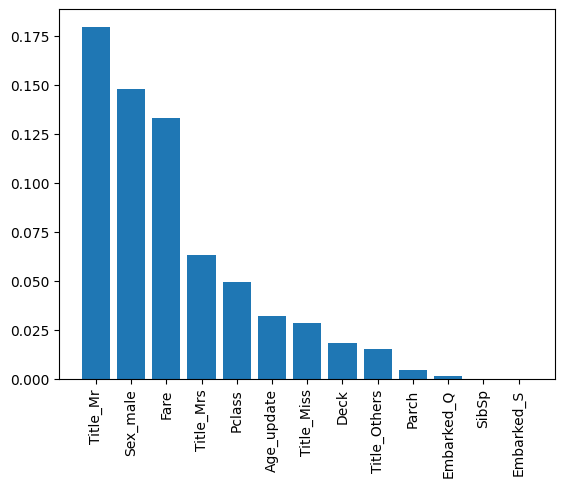

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

feats_drop = ['Survived', 'Name', 'Age', 'Ticket', 'Cabin']
feats_ohe = ['Sex', 'Embarked', 'Title']
feats_oe = ['Deck']

X_temp = df_mod.drop(columns=feats_drop)

oe = OrdinalEncoder()
X_temp['Deck'] = oe.fit_transform(X_temp[feats_oe])

X_ohe = pd.get_dummies(X_temp[feats_ohe], dtype=int, drop_first=True)

X_temp = pd.concat([X_temp.drop(columns=feats_ohe), X_ohe], axis=1)

mic = SelectKBest(mutual_info_classif, k=10)
mic_results = mic.fit(X_temp, df_mod['Survived'])

feature_scores = pd.DataFrame({
    'Features': X_temp.columns,
    'Scores': mic_results.scores_
}).sort_values(by='Scores', ascending=False)

plt.bar(feature_scores['Features'], feature_scores['Scores'])
plt.xticks(rotation=90)
plt.show()


---

## Univarite analysis

### Histogram (numeric distributions)

In [ ]:
# df_mod.drop(columns=['Name','Cabin','Ticket'], inplace=True)

# num_cols = df_mod.select_dtypes(include=['number']).columns
# obj_cols = df_mod.select_dtypes(include=['object']).columns

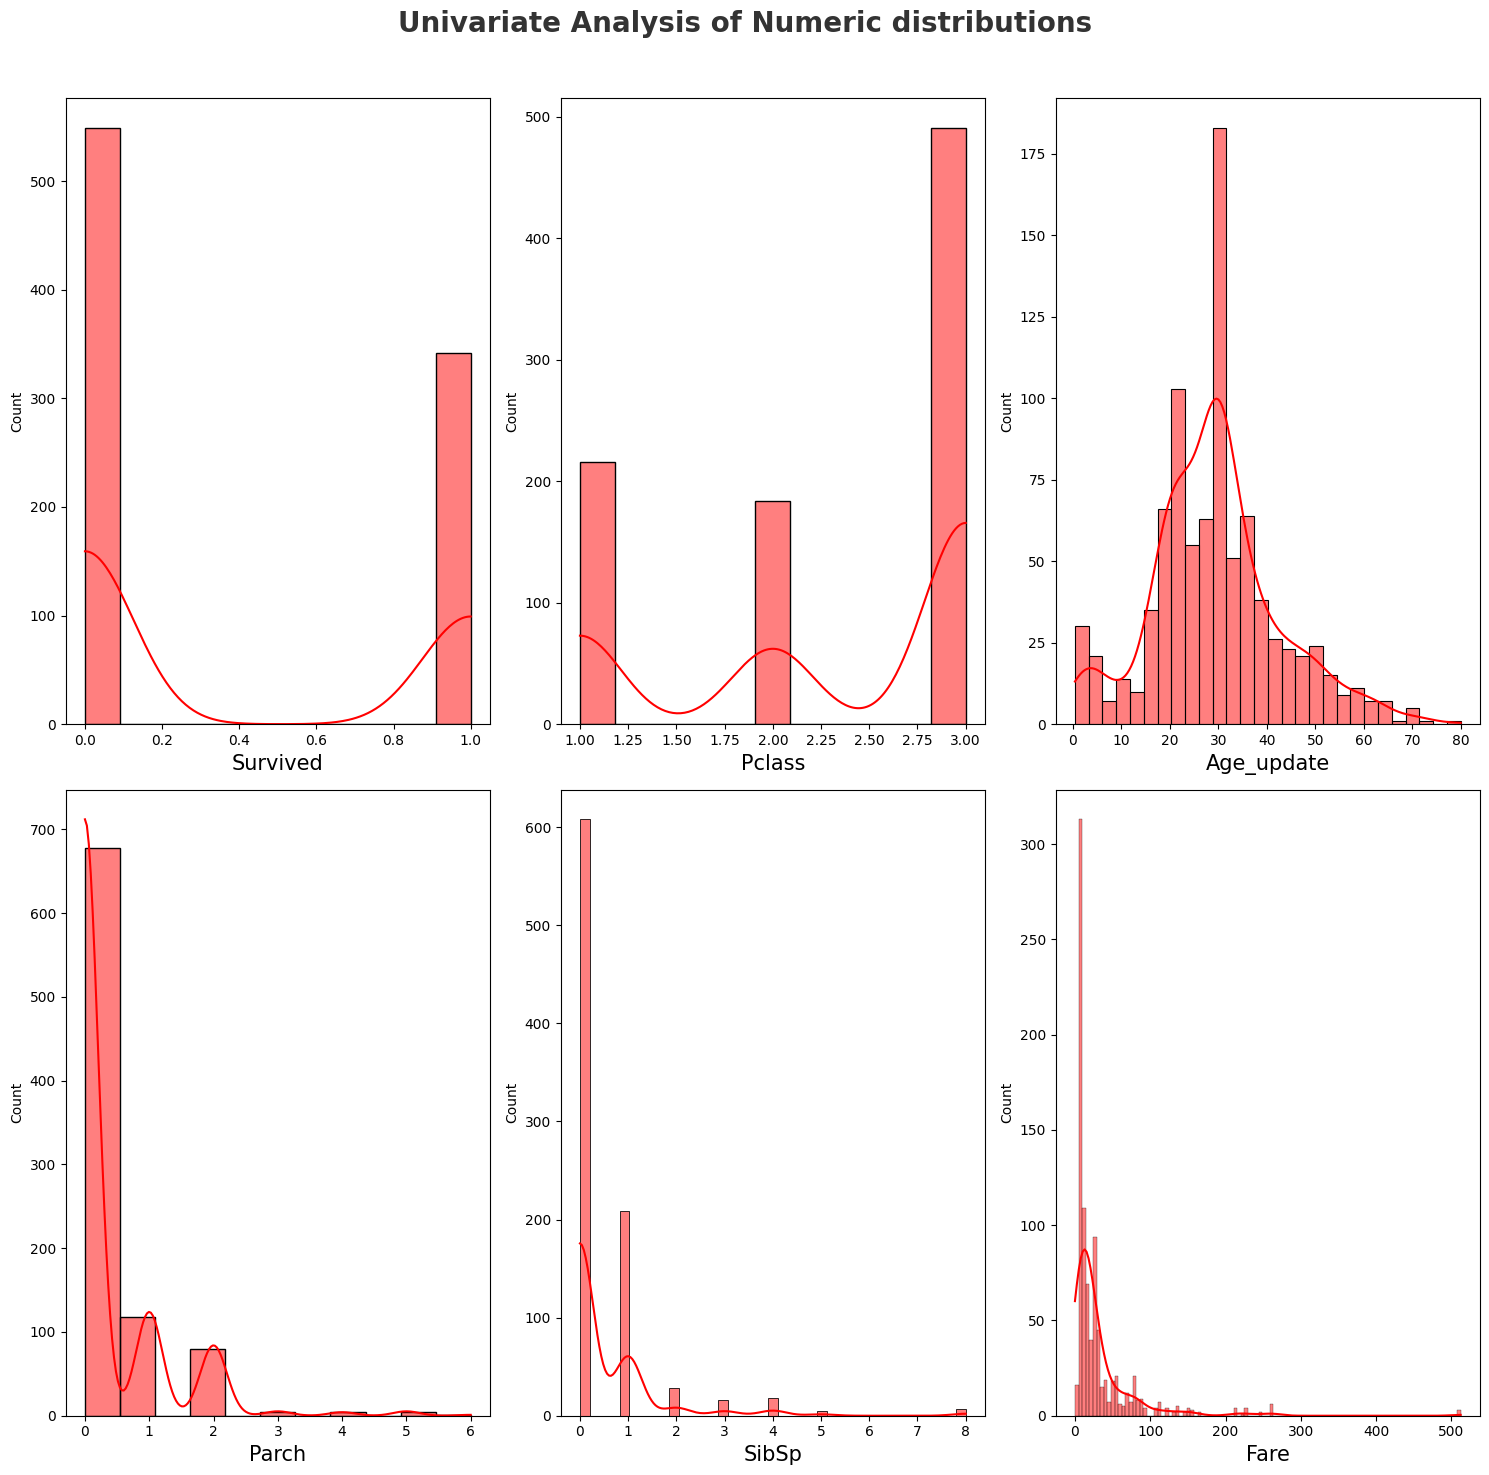

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numeric distributions', fontsize=20, fontweight='bold', alpha=0.8)

num_cols = ['Survived', 'Pclass', 'Age_update','Parch', 'SibSp','Fare']

# Determine the number of rows and columns for the subplots
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  # Adjust layout to fit all columns in a grid of 3 per row
    sns.histplot(df_mod[col], kde=True, color='r')
    plt.xlabel(col, fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()



### Boxplot (numeric features)

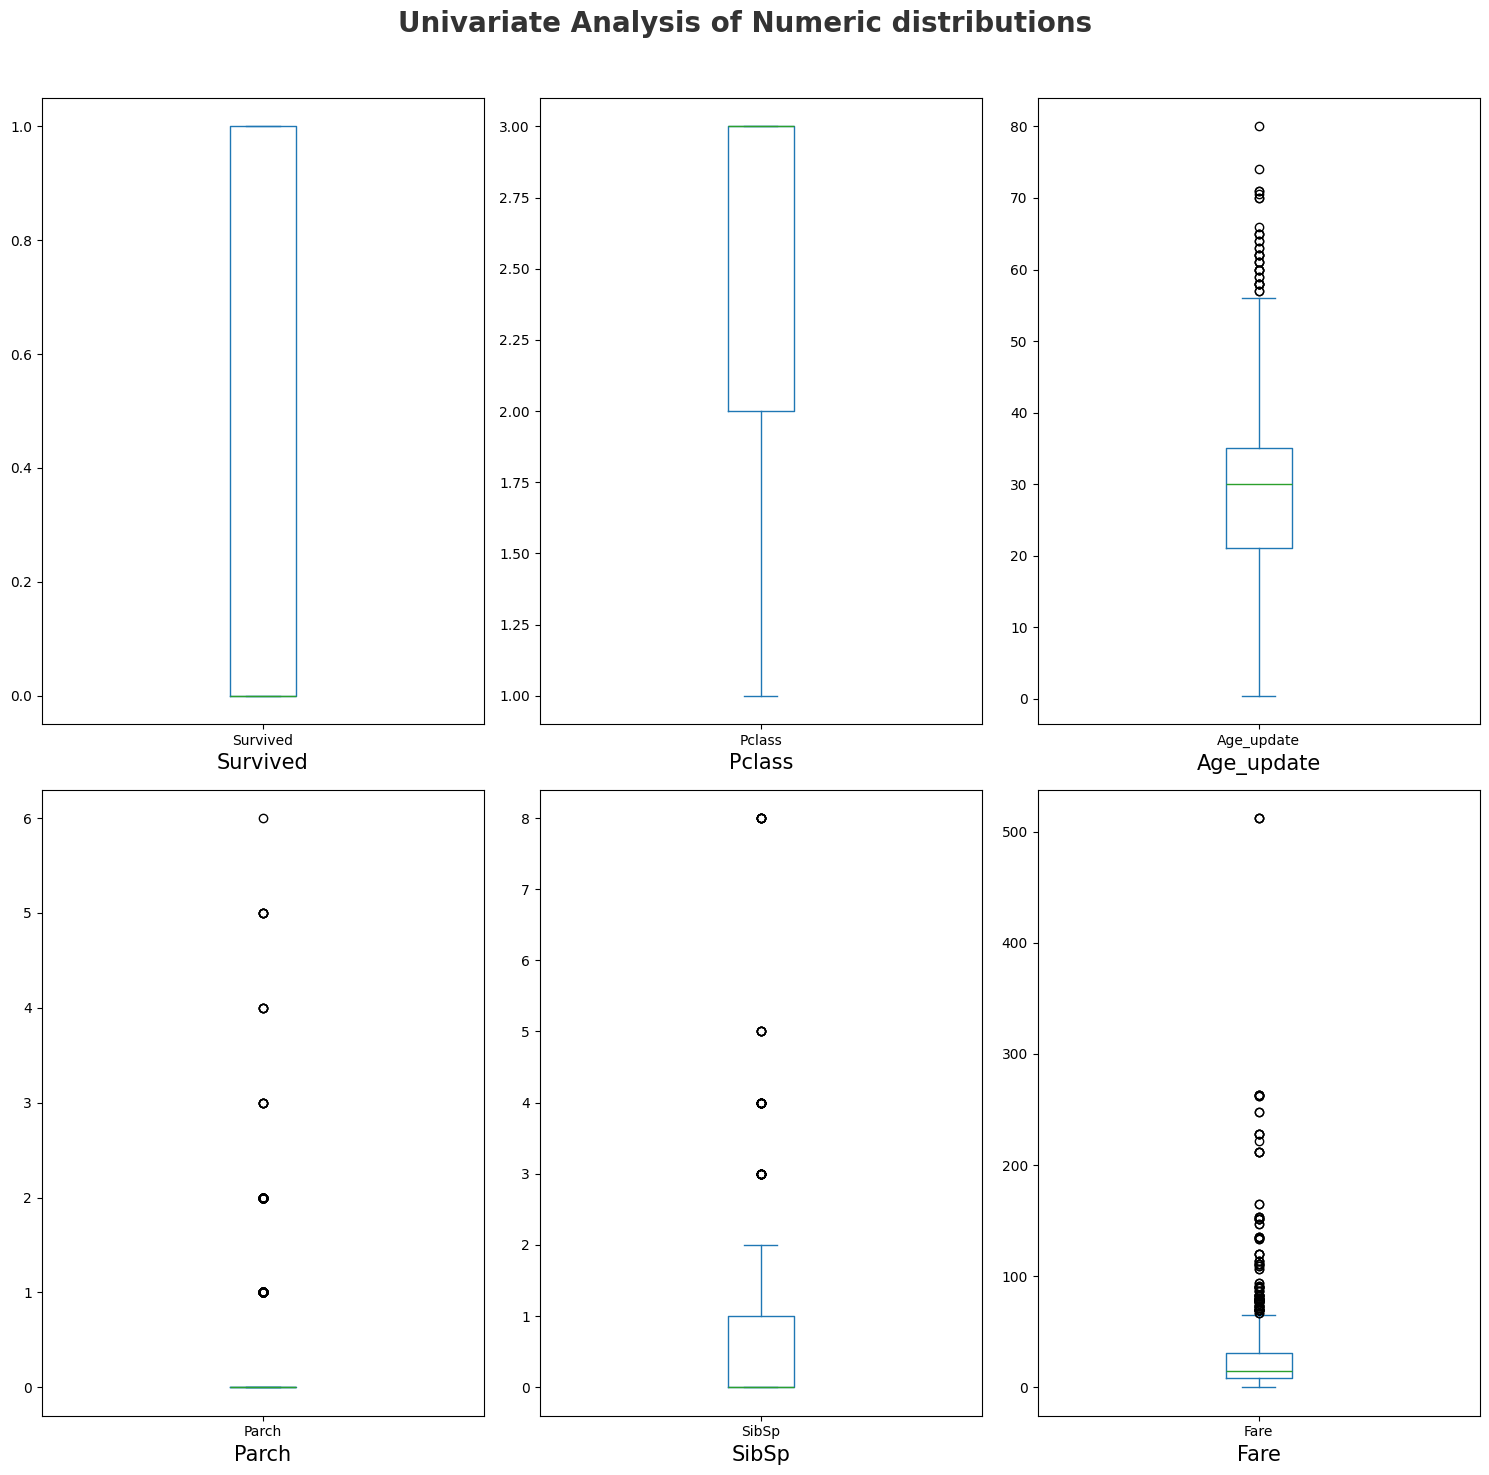

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numeric distributions', fontsize=20, fontweight='bold', alpha=0.8)

# Determine the number of rows and columns for the subplots
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  # Adjust layout to fit all columns in a grid of 3 per row
    df_mod[col].plot(kind='box')
    plt.xlabel(col, fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()



### Histogram (Categorical distributions)

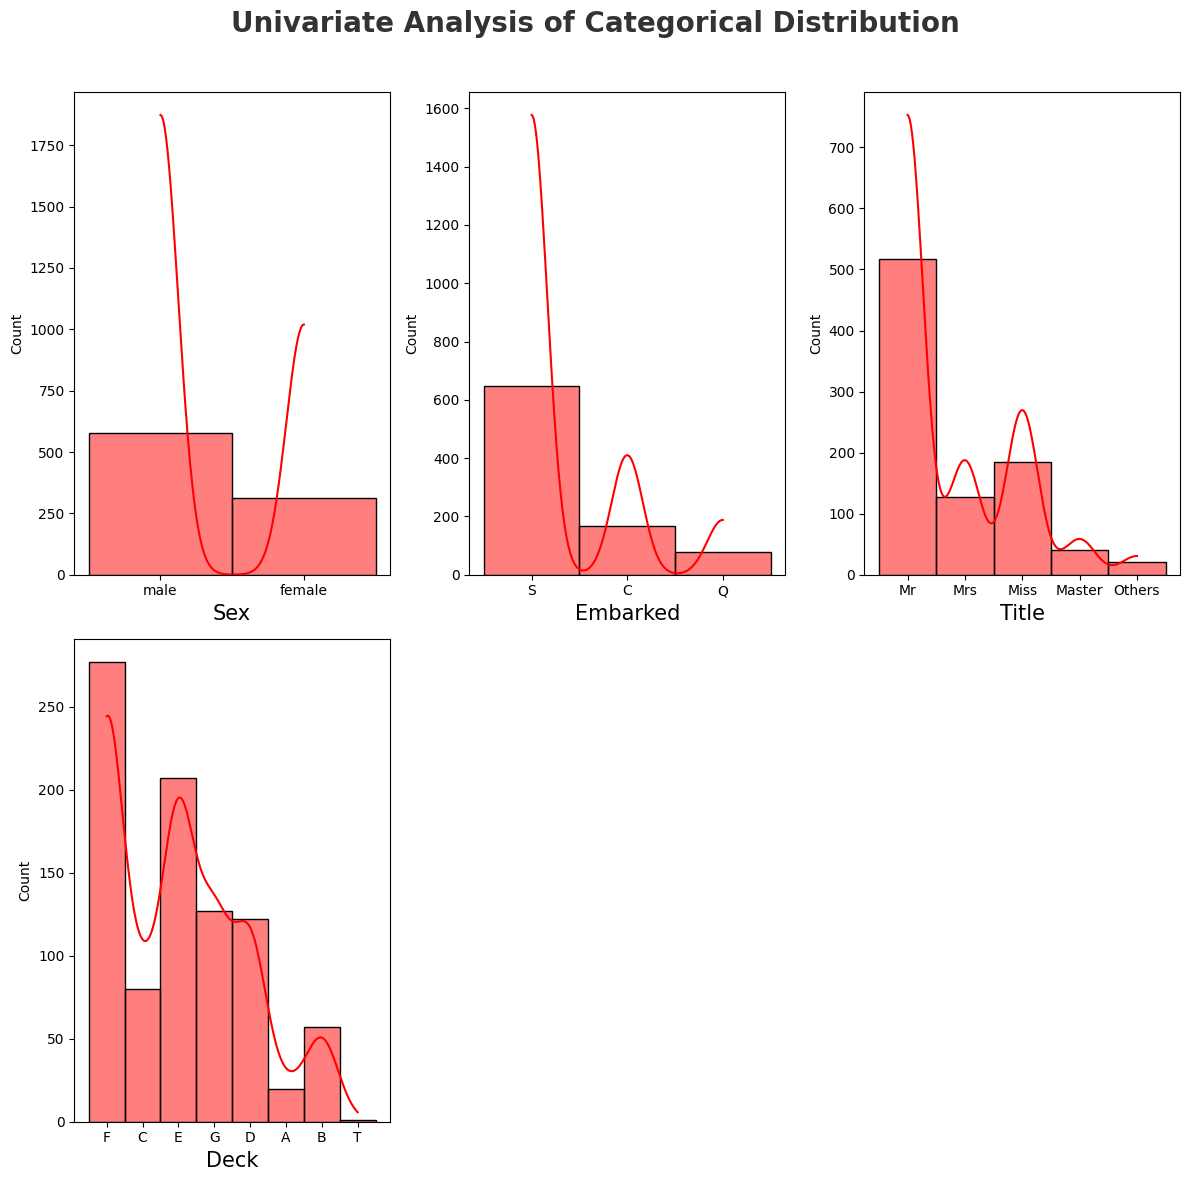

In [ ]:
plt.figure(figsize=(12,12))
plt.suptitle('Univariate Analysis of Categorical Distribution', fontsize=20, fontweight='bold', alpha=0.8)

obj_cols = ['Sex','Embarked','Title','Deck']

# Determine the number of rows and columns for the subplots
num_plots = len(obj_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)

for i, col in enumerate(obj_cols, 1):
    plt.subplot(rows, 3, i)  # Adjust layout to fit all columns in a grid of 3 per row
    sns.histplot(df_mod[col], kde=True, color='r')
    plt.xlabel(col, fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()



## Pair plot

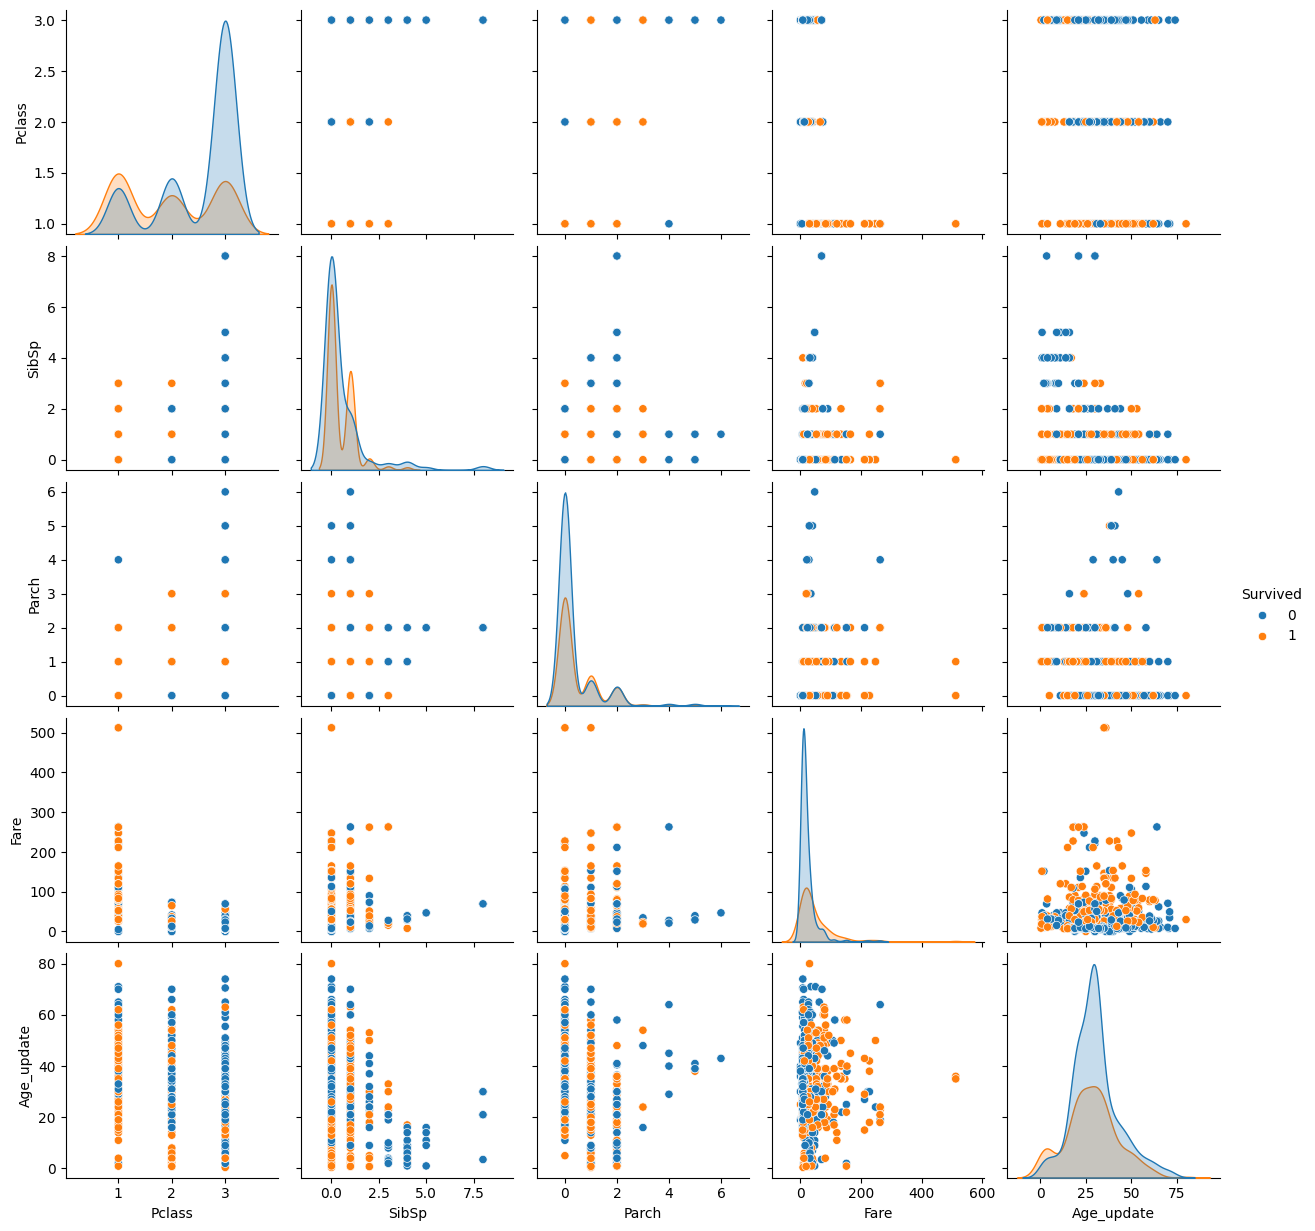

In [ ]:
sns.pairplot(df_mod.drop(columns=['Age']), hue='Survived')

## Bar chart (survival counts by class, deck, sex, title)

In [ ]:
import plotly.express as px

df_survived = df_mod[df_mod['Survived'] == 1]

fig = px.bar(
    df_mod,
    x='Deck',
    y='Survived',
    color='Title', # color seperator
    facet_col='Pclass',  # col seperator
    barmode='group',
    labels={'Survived': 'Survival Count'},  # Label for y-axis
    title='Survival Counts by Pclass, Deck, and Sex'
)

# Update layout for better spacing
fig.update_layout(
    height=600,
    width=1000,
    title_x=0.5,  # Center the title
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

df_survived = df_mod[df_mod['Survived'] == 1]

fig = px.bar(
    df_mod,
    x='Deck',
    y='Survived',
    color='Sex', # color seperator
    facet_col='Pclass',  # col seperator
    barmode='group',
    labels={'Survived': 'Survival Count'},  # Label for y-axis
    title='Survival Counts by Pclass, Deck, and Sex'
)

# Update layout for better spacing
fig.update_layout(
    height=600,
    width=1000,
    title_x=0.5,  # Center the title
)

# Show the plot
fig.show()


## Histogram (age distribution by gender)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create a histogram for the 'Age_update' column, colored by 'Sex'
fig = px.histogram(
    df_mod,  # DataFrame containing the data
    x='Age_update',
    color='Sex',
    marginal='box',  # additional plot on the side for distribution shape
    opacity=0.7,  # transparency
    nbins=20,  #
    title="Age Distribution by Sex",
    labels={'Age_update':'Age', 'count':'Count'}
)

# Show the figure
fig.show()


## Create New feature "Age Group"

In [ ]:
age_bins = [0,10, 20, 30, 40, 50, 60, int(df_mod['Age_update'].max()) +1]
age_labels = ['Children', # 0-10
              'Adolescents',  #11-20
              'Young Adults', #21-30
              'Adults', #31-40
              'Middle-aged adults', #41-50
              'Older adults',  #51-60
              'Seniors' #>60
              ]
age_cat = [1,2,3,4,5,6,7]

df_mod['Age_group_label'] = pd.cut(df_mod['Age_update'], bins=age_bins, labels=age_labels, right=False)
df_mod['Age_group_cat'] = pd.cut(df_mod['Age_update'], bins=age_bins, labels=age_cat, right=False)

## Barplot (Age group count)

In [ ]:
fig = px.bar(df_mod.groupby('Age_group_label').size().reset_index(name='Count'),
             x='Age_group_label', y='Count',
             title='Count of Passengers by Age Group',
             labels={'Age_group_label':'Age Group'}
             )

fig.show()

## Barplot (Survival rate by Age Group)

In [ ]:
survival_by_age = df_mod[df_mod['Survived']==1].groupby('Age_group_label').size()
total_by_age = df_mod.groupby('Age_group_label').size()

survival_rate_by_age = (survival_by_age / total_by_age) * 100
survival_rate_by_age = survival_rate_by_age.reset_index()
survival_rate_by_age.columns = ['Age_group', 'Survival_rate']

# Survival rate by age group
fig = px.bar(survival_rate_by_age,
             x='Age_group', y='Survival_rate',
             title='Survival Rate by Age Group',
             labels={'Age_group':'Age Group', 'Survival_rate':'Survival Rate'},
             )
fig.show()

## Barplot (Survival rate by age group and gender)

In [ ]:
df_age_grp = df_mod.groupby(['Age_group_label', 'Survived','Sex', 'Pclass']).size().reset_index(name='Count')


# Create a Plotly bar chart
fig = px.bar(df_age_grp,
             x='Age_group_label',
             y='Count',
             color='Sex',
             facet_col='Survived',
             barmode='group',  # Groups bars within each age group
             title='Survival Count by Age Group and Gender',
             labels={'Age_group': 'Age Group', 'Count': 'Passenger Count'},
             text='Count',
            #  color_discrete_map={0: 'red', 1: 'green'} # Red for non-survivors, green for survivors
             color_discrete_map={'male': 'blue', 'female': 'orange'} # Set colors for Sex (blue for male, pink for female
             )

# Update layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Passenger Count',
    legend_title_text='Gender',
    hovermode='x',
)

fig.show()

## Barplot (Survival rate by Passenger Class and gender)

In [ ]:
# Create a Plotly bar chart
fig = px.bar(df_age_grp,
             x='Pclass',
             y='Count',
             color='Sex',
             facet_col='Survived',  # Separate facets by survival status
             barmode='group',  # Group bars within each class
             title='Survival Count by Passenger Class and Gender',
             labels={'Pclass': 'Passenger Class', 'Count': 'Passenger Count', 'Sex': 'Gender'},
             text='Count',
             color_discrete_map={'male': 'blue', 'female': 'orange'}
            )

# Update layout
fig.update_layout(
    xaxis_title='Passenger Class',
    yaxis_title='Passenger Count',
    legend_title_text='Gender',
    hovermode='x',
)

fig.show()


## Barplot (survival count by class, deck, age group)

In [ ]:
import plotly.express as px

df_survived = df_mod[df_mod['Survived'] == 1]

fig = px.bar(
    df_mod,
    x='Deck',
    y='Survived',
    color='Age_group_label', # color seperator
    facet_col='Pclass',  # col seperator
    barmode='group',
    labels={'Survived': 'Survival Count'},  # Label for y-axis
    title='Survival Counts by Pclass, Deck, and Age Group'
)

# Update layout for better spacing
fig.update_layout(
    height=600,
    width=1000,
    title_x=0.5,  # Center the title
)

# Show the plot
fig.show()


## Create new features "Fare category"

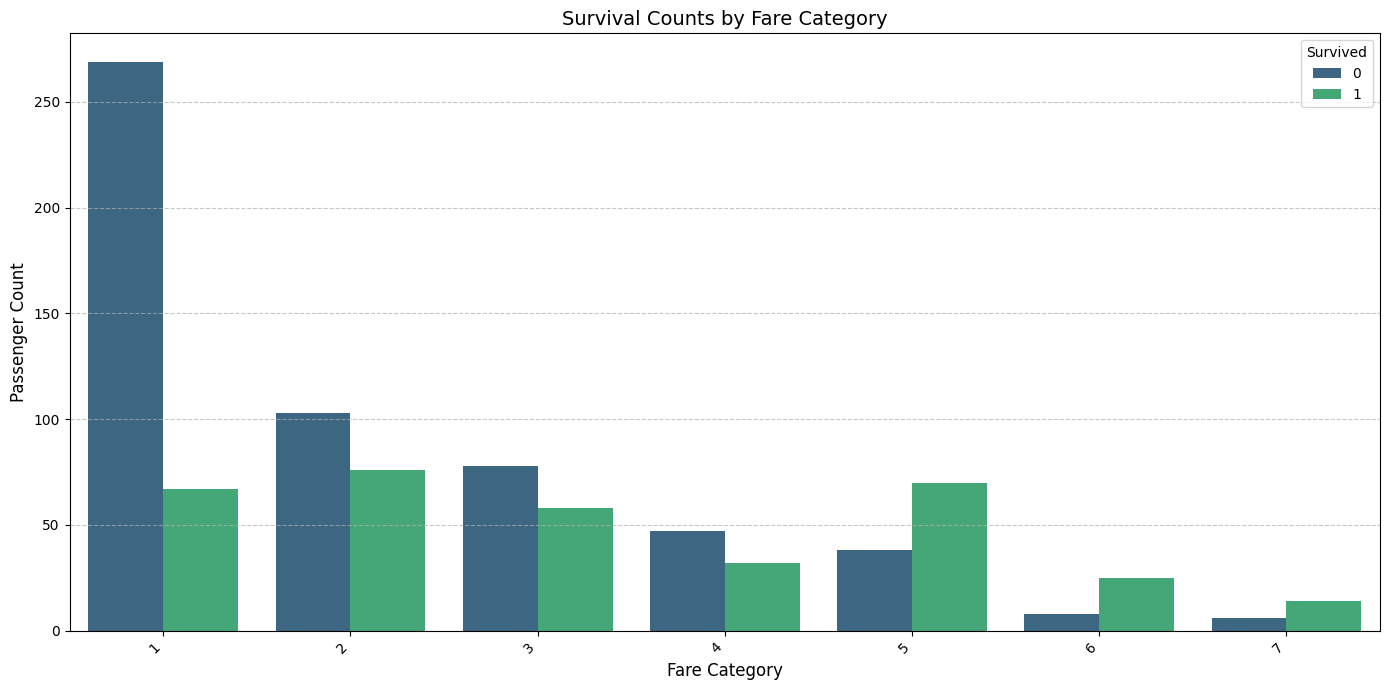

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


bins = [0, 10, 20, 30, 50, 100, 200, df_mod['Fare'].max() + 1]
# bins = np.concatenate([[0], np.logspace(0, np.log10(df_mod['Fare'].max() + 1), num=15)]) # Logarithmic bins
labels = list(range(1, len(bins)))
df_mod['Fare_cat'] = pd.cut(df_mod['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)


plt.figure(figsize=(14, 7))
sns.countplot(data=df_mod, x='Fare_cat', hue='Survived', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Survival Counts by Fare Category', fontsize=14)
plt.xlabel('Fare Category', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# counts
counts = df_mod['Fare_cat'].value_counts(sort=False)

# Create the updated fare_ranges DataFrame
fare_ranges_update = pd.DataFrame({
    'Lower Bound': bins[:-1],
    'Upper Bound': bins[1:],
    'Label': labels,
    'Counts': counts.values
})
fare_ranges_update


,Lower Bound,Upper Bound,Label,Counts
0,0,10.0000,1,336
1,10,20.0000,2,179
2,20,30.0000,3,136
3,30,50.0000,4,79
4,50,100.0000,5,108
5,100,200.0000,6,33
6,200,513.3292,7,20


## Create new feature 'Family_grp'

In [ ]:
def categorize_family(parch, sibsp):
    size = parch + sibsp + 1  # Calculate family size
    if size == 1:
        return 'Solo'
    elif 2 <= size <= 3:
        return 'Small'
    elif size == 4:
        return 'Average'
    elif size > 4:
        return 'Large'
    else:
        return 'Unknown'  # Handle unexpected cases

# Apply the function row-wise to calculate family groups
df_mod['Family_grp'] = df_mod.apply(lambda row: categorize_family(row['Parch'], row['SibSp']), axis=1)

# Map categorical labels to numerical values
category_map = {'Solo': 1, 'Small': 2, 'Average': 3, 'Large': 4, 'Unknown': 0}
df_mod['Family_grp'] = df_mod['Family_grp'].map(category_map)

df_mod['Family_grp'].value_counts()

,count
Family_grp,
1,537
2,263
4,62
3,29


## Create new feature "Sex_class"

In [ ]:
df_mod['Sex_class'] = df_mod['Sex'].map({'male':0.6,'female':0.5}) * df_mod['Pclass']

df_mod['Sex_class'].value_counts()

,count
Sex_class,
1.8,347
1.5,144
0.6,122
1.2,108
0.5,94
1.0,76


# Predictive modeling

In [ ]:
df_mod.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_update,Deck,Age_group_label,Age_group_cat,Family_grp,Sex_class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0,F,Young Adults,3,2,1.8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,C,Adults,4,2,0.5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0,E,Young Adults,3,1,1.5
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,C,Adults,4,2,0.5
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,E,Adults,4,1,1.8


## Train Validate Split

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

feat_drop = ['Name','Age','Cabin','Ticket','Age_group_label']  # Drop these features

df_temp = df_mod.drop(columns=feat_drop)
df_temp.rename(columns={"Age_update": "Age"}, inplace=True)
df_temp['Embarked'] = df_temp['Embarked'].map({'S':1,'C':2,'Q':3})
df_temp['Deck'] = df_temp['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':1})
df_temp['Sex'] = df_temp['Sex'].map({'male':1,'female':0})
df_temp['Title'] = df_temp['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Others':25})

X = df_temp.drop(columns=['Survived'])
y = df_temp['Survived']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         891 non-null    int64   
 1   Sex            891 non-null    int64   
 2   SibSp          891 non-null    int64   
 3   Parch          891 non-null    int64   
 4   Fare           891 non-null    float64 
 5   Embarked       891 non-null    int64   
 6   Title          891 non-null    int64   
 7   Age            891 non-null    float64 
 8   Deck           891 non-null    int64   
 9   Age_group_cat  891 non-null    category
 10  Fare_cat       891 non-null    category
 11  Family_grp     891 non-null    int64   
 12  Sex_class      891 non-null    float64 
dtypes: category(2), float64(3), int64(8)
memory usage: 79.1 KB


In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 14), (179, 14), (712,), (179,))

## Features Selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV

# Fit ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Extract feature importances
et_importances = et_model.feature_importances_

# # Fit RFE with RandomForestClassifier
# estimator = RandomForestClassifier(n_estimators=100, random_state=42)
# rfe = RFE(estimator=estimator, n_features_to_select=5)
# rfe.fit(X_train, y_train)

# Fit RFECV w RandomForestClassifier
estimator2 = RandomForestClassifier(n_estimators=100, random_state=43)
rfecv = RFECV(estimator=estimator2, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Create a DataFrame with results
results_df = pd.DataFrame({
    'Feature': X_train.columns,
    'ExtraTreesClassifier (%)': np.round(et_importances * 100, 2),
    # 'RFE Ranking': rfe.ranking_,
    'RFE Ranking CV': rfecv.ranking_
}).sort_values(by='ExtraTreesClassifier (%)', ascending=False)

# Display results
results_df


,Feature,ExtraTreesClassifier (%),RFE Ranking CV
1,Sex,19.59,1
7,Age,16.09,1
4,Fare,14.38,1
12,Sex_class,10.08,1
9,Age_group_cat,6.65,1
0,Pclass,5.74,4
6,Title,5.55,1
8,Deck,5.47,1
10,Fare_cat,4.55,3
11,Family_grp,3.30,2


## <s>Feature Scaling</s>

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

In [ ]:
# # Set up the figure and subplots
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Boxplot for X_train with color
# axes[0].boxplot(X_train, boxprops=dict(color="blue"), medianprops=dict(color="red"), labels=X_train.columns)
# axes[0].set_title('X_train before scaling')
# axes[0].tick_params(axis='x', rotation=90)

# # Boxplot for X_train_scaled with color
# axes[1].boxplot(X_train_scaled, boxprops=dict(color="green"), medianprops=dict(color="orange"), labels=X_train.columns)
# axes[1].set_title('X_train after scaling')
# axes[1].tick_params(axis='x', rotation=90)

# # Display the plots
# plt.show()


## Function library

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def model_evaluation(model, X_test, y_test):
    # # Handle missing values
    # imputer = SimpleImputer(strategy='median')
    # X_test_imputed = imputer.fit_transform(X_test)  # Impute test data

    # Predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    print(f"----- {type(model).__name__} Evaluation Metrics -----")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix display
    print(f"\nConfusion Matrix: {type(model).__name__}")
    confusion_matrix_ = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, display_labels=model.classes_)
    disp.plot()
    plt.show()

    # Feature Importance
    try:
        # For models with 'feature_importances_' attribute (e.g., tree-based models)
        feat_impt = pd.DataFrame({'Feature': X_test.columns, 'Importance': model.feature_importances_})
    except AttributeError:
        try:
            # For models with 'coef_' attribute (e.g., linear models)
            feat_impt = pd.DataFrame({'Feature': X_test.columns, 'Importance': model.coef_.flatten()})
        except AttributeError:
            print("\nFeature importances are not available for this model.")
            return

    # Sort and filter feature importance
    feat_impt = feat_impt.sort_values(by='Importance', ascending=False)

    # Plotting feature importance
    plt.figure(figsize=(10, 8), dpi=100)
    sns.barplot(data=feat_impt.head(10), y='Feature', x='Importance')
    plt.title(f"Top 10 Feature Importance for {type(model).__name__}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


## Base Model comparison

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold # StratifiedKFold is target is imbalance
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt

# # Define the models
# models = {
#     'LR': LogisticRegression(max_iter=1000),
#     'LDA': LinearDiscriminantAnalysis(),
#     'SVM': SVC(),
#     'k-NN': KNeighborsClassifier(),
#     'CART': DecisionTreeClassifier(),
#     'NB': GaussianNB(),
#     'RFC': RandomForestClassifier(),
#     'GBC': GradientBoostingClassifier(),
#     'Ada': AdaBoostClassifier()
# }

# # Evaluate each model using k-fold cross-validation
# results = []
# model_names = []
# for name, model in models.items():
#     kfold = KFold(n_splits=10, shuffle=True, random_state=101)
#     scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(scores)
#     model_names.append(name)
#     print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

# # Boxplot of results
# plt.figure(figsize=(12, 7))
# plt.boxplot(results, labels=model_names, showmeans=True)
# plt.title('Model Comparison - Accuracy')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

ScaledLR: Mean Accuracy = 0.799, Std = 0.025
ScaledLDA: Mean Accuracy = 0.812, Std = 0.042
Scaledk-NN: Mean Accuracy = 0.803, Std = 0.031
ScaledSVM: Mean Accuracy = 0.812, Std = 0.045
NB: Mean Accuracy = 0.737, Std = 0.031
DT: Mean Accuracy = 0.767, Std = 0.032
RFC: Mean Accuracy = 0.822, Std = 0.040
GBC: Mean Accuracy = 0.841, Std = 0.049
Ada: Mean Accuracy = 0.819, Std = 0.048


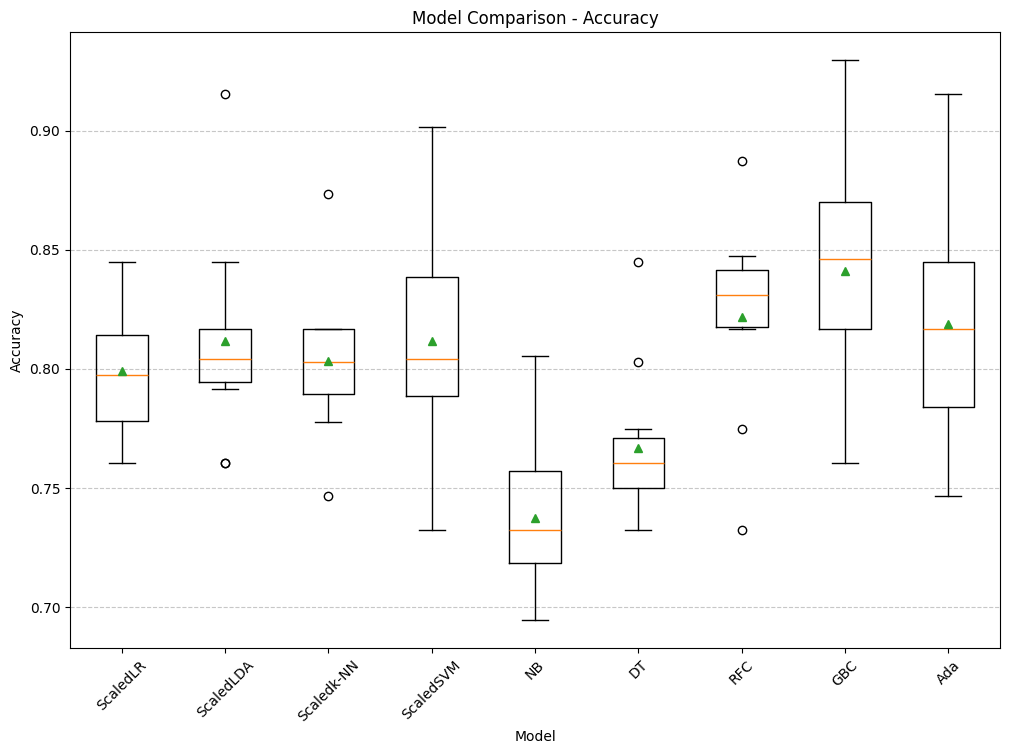

In [ ]:
from sklearn.model_selection import cross_val_score, KFold # StratifiedKFold is target is imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define models in a dictionary
models = {
    'ScaledLR': Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=1000))]),
    'ScaledLDA': Pipeline([('scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())]),
    'Scaledk-NN': Pipeline([('scaler', StandardScaler()), ('k-NN', KNeighborsClassifier())]),
    'ScaledSVM': Pipeline([('scaler', StandardScaler()), ('SVM', SVC())]),
    'NB': GaussianNB(),  # No need for scaling
    'DT': DecisionTreeClassifier(),  # No need for scaling
    'RFC': RandomForestClassifier(),  # No need for scaling
    'GBC': GradientBoostingClassifier(),
    'Ada': AdaBoostClassifier()
}

# Evaluate each model
results = []
model_names = []
for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=101)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(scores)
    model_names.append(name)
    print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

# Boxplot of results
plt.figure(figsize=(12, 8))
plt.boxplot(results, labels=model_names, showmeans=True)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score, KFold # StratifiedKFold is target is imbalance
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import RFECV
# import matplotlib.pyplot as plt

# def models_setup(rfe_mode=None):
#     '''
#     rfe_mode:
#         Default: RandomForestClassifier
#         Or: 'ExtraTreesClassifier'.
#     '''
#     if rfe_mode is None:
#         rfe_mode = RandomForestClassifier(n_estimators=100, random_state=42)
#     elif rfe_mode == 'ExtraTreesClassifier':
#         rfe_mode = ExtraTreesClassifier(random_state=42)

#     models = {}

#     # Logistic Regression
#     models['LR'] = Pipeline([
#         ('scaler', StandardScaler()),
#         ('rfecv', RFECV(estimator=rfe_mode)),
#         ('LR', LogisticRegression(max_iter=1000))
#     ])

#     # Linear Discrimant Analysis
#     models['LDA'] = Pipeline([
#         ('scaler', StandardScaler()),
#         ('rfecv', RFECV(estimator=rfe_mode)),
#         ('LDA', LinearDiscriminantAnalysis())
#     ])

#     # SVM
#     models['SVM'] = Pipeline([
#         ('scaler', StandardScaler()),
#         ('rfecv', RFECV(estimator=rfe_mode)),
#         ('svm', SVC())
#     ])

#     # KNN
#     models['KNN'] = Pipeline([
#         ('scaler', StandardScaler()),
#         ('knn', KNeighborsClassifier())
#     ])

#     # Decision Tree
#     models['DTC'] = DecisionTreeClassifier()

#     # Naive Bayes
#     models['NB'] = GaussianNB()

#     # Random Forest
#     models['RFC'] = RandomForestClassifier()

#     # Gradient Boosting
#     models['GBC'] = GradientBoostingClassifier()

#     # AdaBoost
#     models['Ada'] = AdaBoostClassifier()

#     return models



# def base_model(model, X, y):
#     kfold = KFold(n_splits=10, shuffle=True, random_state=101)
#     scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
#     return scores

# # Generate models
# models = models_setup(rfe_mode=RandomForestClassifier())

# # Evaluate models
# results, names = [], []
# for name, model in models.items():
#     scores = base_model(model, X_train, y_train)
#     results.append(scores)
#     names.append(name)
#     print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')


# # Boxplot of results
# plt.figure(figsize=(10, 6))
# plt.boxplot(results, labels=names, showmeans=True)
# plt.title('Model Comparison - Accuracy')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


## SVM Hyperparameter tuning

In [ ]:
# from sklearn.svm import SVC
# from sklearn.feature_selection import RFECV
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import uniform, randint

# # Define the RFECV + SVM Pipeline
# pipeline = Pipeline([
#     ('sc', StandardScaler()),
#     ('rfe', RFECV(estimator=RandomForestClassifier(random_state=42),
#                   scoring='accuracy',
#                   cv=5)),
#     ('svm', SVC())
# ])

# # Define parameter distribution for RandomizedSearchCV
# param_distributions = {
#     'svm__C': uniform(0.001, 100),  # Continuous distribution for C
#     'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel options
#     'svm__gamma': ['scale', 'auto'],  # Gamma options
#     'svm__degree': randint(2, 4),  # Integer values for degree
#     'svm__class_weight': ['balanced', None]  # Class weight options
# }

# # RandomizedSearchCV to find the best parameters
# random_search = RandomizedSearchCV(estimator=pipeline,
#                                    param_distributions=param_distributions,
#                                    n_iter=50,  # Number of random parameter sets to try
#                                    cv=5,
#                                    scoring='accuracy',
#                                    n_jobs=-1,
#                                    random_state=42)
# random_search.fit(X_train, y_train)

# # Display the best parameters and accuracy
# print(f"Best Parameters: {random_search.best_params_}")
# print(f"Best Accuracy: {random_search.best_score_:.3f}")

# # Save the best model
# best_search = random_search.best_estimator_

# # Evaluate on best model
# model_evaluation(best_search, X_test, y_test)
# model_evaluation(random_search, X_test, y_test)

## GBC Hyperparameter tuning

----- GradientBoostingClassifier Evaluation Metrics -----
Accuracy: 0.816

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.89      0.68      0.77        80

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.81       179


Confusion Matrix: GradientBoostingClassifier


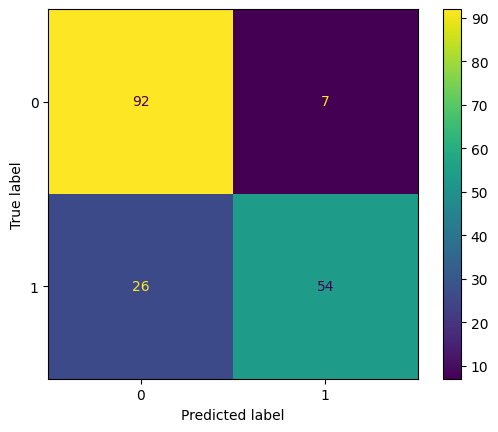

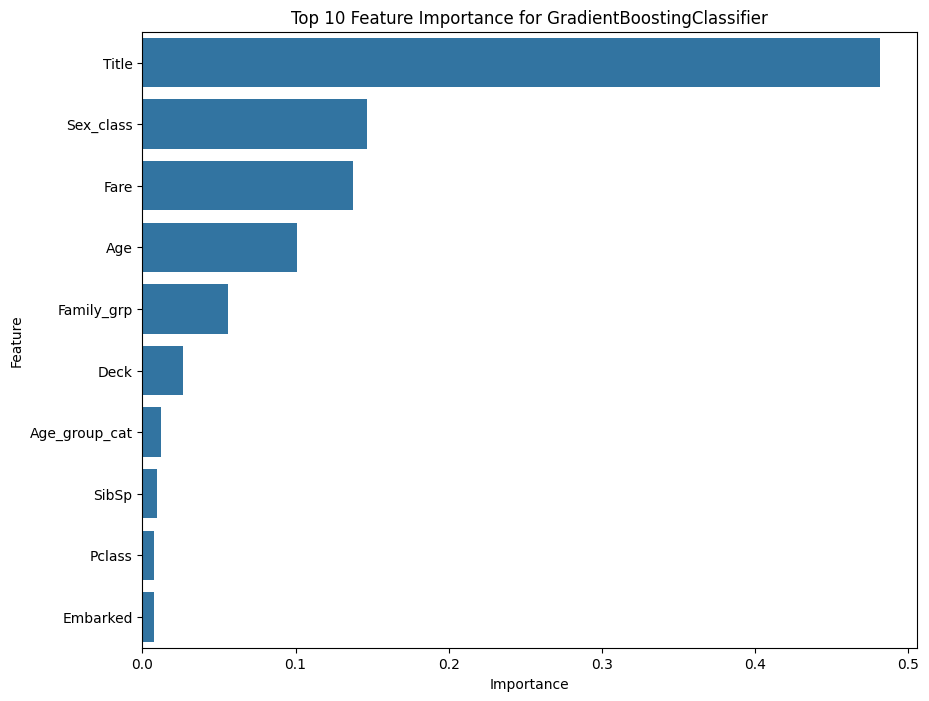

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Evaluate on best model
model_evaluation(gbc, X_test, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.829
Best Estimator: GradientBoostingClassifier(n_estimators=50, random_state=42)
----- GradientBoostingClassifier Evaluation Metrics -----
Accuracy: 0.832

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        99
           1       0.93      0.68      0.78        80

    accuracy                           0.83       179
   macro avg       0.86      0.82      0.82       179
weighted avg       0.85      0.83      0.83       179


Confusion Matrix: GradientBoostingClassifier


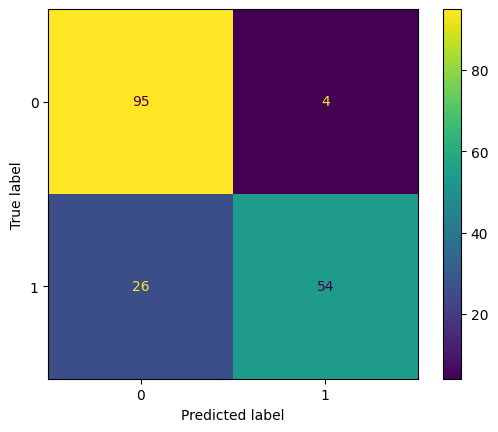

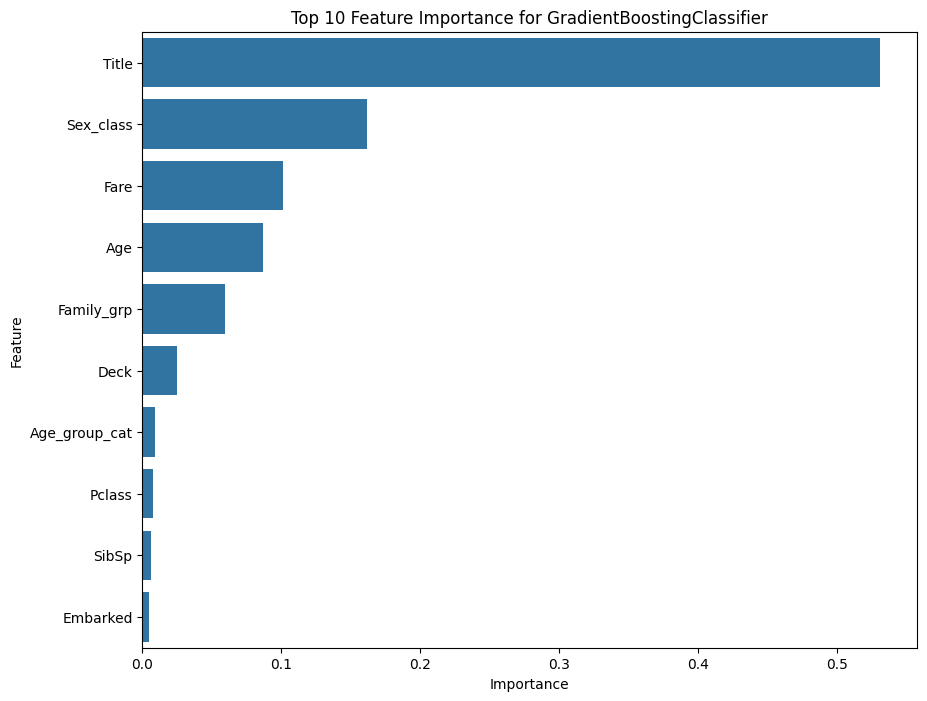

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': np.logspace(-2, -1, 3),
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           )

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters, accuracy, and estimator
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.3f}")
print(f"Best Estimator: {grid_search.best_estimator_}")

# Save the best model
best_search = grid_search.best_estimator_

# Evaluate on best model
model_evaluation(best_search, X_test, y_test)

---

# Final Test


In [ ]:
url_test = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/titanic_test.csv'

test_data = pd.read_csv(url_test)

class Titanic:
    def __init__(self, df):
        self.df = df.copy()
        self.add_title()
        self.fill_missing_values()
        self.add_deck()
        self.add_age_group()
        self.add_fare_category()
        self.add_family_group()
        self.add_sex_class()
        self.encode_categorical_features()
        self.drop_columns()
        cols = ['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Embarked','Title','Age','Deck','Age_group_cat','Fare_cat','Family_grp','Sex_class']
        self.df = self.df[cols]

    def add_title(self):
        self.df['Title'] = self.df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
        self.df['Title'] = self.df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
                                                     'Sir', 'Jonkheer', 'Dona'], 'Others')
        self.df['Title'] = self.df['Title'].replace(['Mlle', 'Ms'], 'Miss')
        self.df['Title'] = self.df['Title'].replace(['Mme', 'Lady', 'Countess'], 'Mrs')

    def fill_missing_values(self):
        self.df['Age'] = self.df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
        self.df['Fare'] = self.df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
        self.df['Embarked'] = self.df['Embarked'].fillna(self.df['Embarked'].mode()[0])

    def add_deck(self):
        self.df['Deck'] = self.df['Cabin'].str[0].fillna('U')
        df_temp = self.df[self.df['Deck'] == 'U'].copy()
        df_temp = pd.get_dummies(df_temp, columns=['Embarked'], dtype=int)
        for col in ['Embarked_Q', 'Embarked_S', 'Embarked_C']:
            if col not in df_temp.columns:
                df_temp[col] = 0
        feat_for_deck = df_temp[['Pclass', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]
        self.df.loc[self.df['Deck'] == 'U', 'Deck'] = best_rf_model.predict(feat_for_deck)

    def add_age_group(self):
        age_bins = [0, 10, 20, 30, 40, 50, 60, int(self.df['Age'].max())+1]
        age_cat = [1, 2, 3, 4, 5, 6, 7]
        self.df['Age_group_cat'] = pd.cut(self.df['Age'], bins=age_bins, labels=age_cat, right=False)

    def add_fare_category(self):
        fare_bins = [0, 10, 20, 30, 50, 100, 200, self.df['Fare'].max() + 1]
        labels = list(range(1, len(fare_bins)))
        self.df['Fare_cat'] = pd.cut(self.df['Fare'], bins=fare_bins, labels=labels, right=False)

    def add_family_group(self):
        self.df['Family_size'] = self.df['SibSp'] + self.df['Parch'] + 1
        self.df['Family_grp'] = pd.cut(
            self.df['Family_size'],
            bins=[0, 1, 3, 4, float('inf')],
            labels=[1, 2, 3, 4],
            right=False)

    def add_sex_class(self):
        sex = self.df['Sex'].map({'male':0.6, 'female':0.5})
        self.df['Sex_class'] = sex * self.df['Pclass']

    def encode_categorical_features(self):
        self.df['Embarked'] = self.df['Embarked'].map({'S':1,'C':2,'Q':3})
        self.df['Sex'] = self.df['Sex'].map({'male':1, 'female':0.5})
        self.df['Deck'] = self.df['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':1})
        self.df['Title'] = self.df['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Others':25})

    def drop_columns(self):
        columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Family_size']
        self.df.drop(columns=columns_to_drop, inplace=True, errors='ignore')





df_test = pd.read_csv(url_test)
test = Titanic(df_test)
test.df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age,Deck,Age_group_cat,Fare_cat,Family_grp,Sex_class
0,892,3,1.0,0,0,7.8292,3,1,34.5,6,4,1,2,1.8
1,893,3,0.5,1,0,7.0000,1,3,47.0,6,5,1,2,1.5
2,894,2,1.0,0,0,9.6875,3,1,62.0,5,7,1,2,1.2
3,895,3,1.0,0,0,8.6625,1,1,27.0,5,3,1,2,1.8
4,896,3,0.5,1,1,12.2875,1,3,22.0,5,3,2,3,1.5


In [ ]:
X_test = test.df.drop(['PassengerId'], axis=1)

test.df['Survived'] = best_search.predict(X_test)

output = test.df[['PassengerId', 'Survived']]
output.to_csv('prediction_final.csv', index=False)

print("Predictions saved to 'prediction_final.csv'")

Predictions saved to 'prediction_final.csv'


---

# Check

In [ ]:
# og_train_data = df.copy()

# def add_title(name):
#     # Use regex to extract the title
#     return name.str.extract(r' ([A-Za-z]+)\.', expand=False)

# def update_title(titles):
#     # Standardize to common titles
#     titles = titles.replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
#     titles = titles.replace(['Mlle', 'Ms'], 'Miss')
#     titles = titles.replace(['Mme', 'Lady', 'Countess'], 'Mrs')
#     return titles

# # # Create new dataframe for modification
# og_train_data['Title'] = add_title(df_mod['Name'])
# og_train_data['Title'] = update_title(df_mod['Title'])

# # og_train_data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
# og_train_data.drop(columns=['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Embarked'], inplace=True)
# og_train_data = pd.get_dummies(og_train_data, dtype=int, drop_first=True)

# og_train_data['Age'] = og_train_data['Age'].fillna(og_train_data['Age'].median())

# X = og_train_data.drop(columns=['Survived', ])
# y = og_train_data['Survived']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import GradientBoostingClassifier
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# gbc = GradientBoostingClassifier(random_state=42)
# gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# url_test = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/titanic_test.csv'
# test_data = pd.read_csv(url_test)

# og_test_data = test_data.copy()
# og_test_data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
# og_test_data = pd.get_dummies(og_test_data, dtype=int, drop_first=True)

# og_test_data['Age'] = og_test_data['Age'].fillna(og_test_data['Age'].median())
# og_test_data['Fare'] = og_test_data['Fare'].fillna(og_test_data['Fare'].median())
# sc = StandardScaler()
# og_test_data = sc.fit_transform(og_test_data)
# test_data['Survived'] = gbc.predict(og_test_data)

# output = test_data[['PassengerId', 'Survived']]
# output.to_csv('prediction_check.csv', index=False)

# print("Predictions saved to 'prediction_check.csv'")

Predictions saved to 'prediction_check.csv'
